In [219]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Metodo de Newton Raphson

In [220]:
# Define the function f(x)
x = sp.Symbol('x')
f = sp.cos(x) - x

# Define the derivative f'(x)
df = f.diff(x)

# Define the function f(x) as a lambda function
f_func = sp.lambdify(x, f)

# Define the derivative f'(x) as a lambda function
df_func = sp.lambdify(x, df)

N = 10
x = 1.0 # initial guess
for i in range(1, N+1):
    x = x - f_func(x)/df_func(x)
    print(f"n= {str(i)}, error = {x}")
root = x
# Print the approximate root
print("The approximate root is:", x)

n= 1, error = 0.7503638678402439
n= 2, error = 0.7391128909113617
n= 3, error = 0.739085133385284
n= 4, error = 0.7390851332151607
n= 5, error = 0.7390851332151607
n= 6, error = 0.7390851332151607
n= 7, error = 0.7390851332151607
n= 8, error = 0.7390851332151607
n= 9, error = 0.7390851332151607
n= 10, error = 0.7390851332151607
The approximate root is: 0.7390851332151607


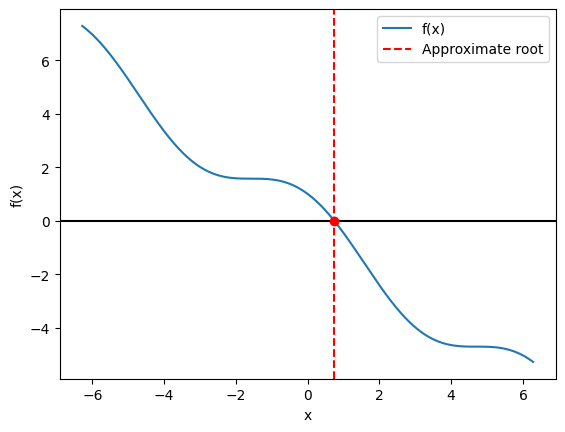

In [221]:
# Plot the function f(x) and the approximate root
x_vals = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_vals = f_func(x_vals)
root_y = f_func(root)

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label='f(x)')
ax.axhline(y=0, color='k')
ax.axvline(x=root, color='r', linestyle='--', label='Approximate root')
ax.plot(root, root_y, 'ro')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
plt.show()

# Metodo del Secante

In [222]:
# Define the function f(x)
f = lambda x: np.cos(x) - x

# initial guesses
x0 = 0.0
x1 = 1.0
f0 = f(x0)
x = 0.0
errors = []
xs = []
iter = 11

# loop over iterations
for i in range(2, iter):
    f1 = f(x1)
    if f1 - f0 == 0:
        x = x1
    else:
        x_prev = x
        x = x1 - (x1 - x0)*f1/(f1 - f0)
        x0 = x1
        f0 = f1
    x1 = x
    error = abs((x - x_prev)/x) if x != 0 else 0 # avoid division by zero
    errors.append(error)
    xs.append(x)
    print("n=" + str(i-1) + ": " + str(x) + ", error: " + str(error))

n=1: 0.6850733573260451, error: 1.0
n=2: 0.736298997613654, error: 0.06957179142390695
n=3: 0.7391193619116293, error: 0.003815844156322459
n=4: 0.7390851121274639, error: 4.634078484797597e-05
n=5: 0.7390851332150012, error: 2.8531946368906678e-08
n=6: 0.7390851332151607, error: 2.1570996245402784e-13
n=7: 0.7390851332151607, error: 0.0
n=8: 0.7390851332151607, error: 0.0
n=9: 0.7390851332151607, error: 0.0


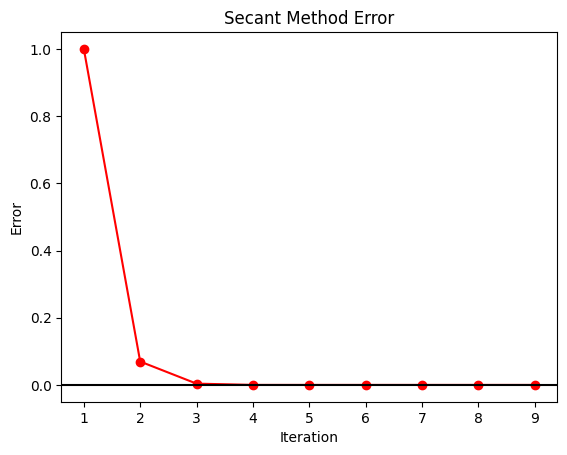

In [223]:
# plot the errors with a line at y=0
plt.plot(range(1, 10), errors, 'ro-')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Secant Method Error')
plt.axhline(y=0, color='k')
plt.show()